## Autoencoder

In this example, we will use an autoencoder to 'learn' to recrate hand written digits.

In [19]:
import numpy as np


### Load and normalize our data

In [20]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


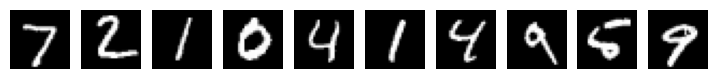

In [21]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

#### Load our pretrained model

In [22]:
from tensorflow import keras

pretrained_model = keras.models.load_model('initially_trained_autoencoder.h5', compile = False)

### Test the autoencoder model by reconstructing the test images and visually inspecting the results.

313/313 [==============================] - 1s 2ms/step


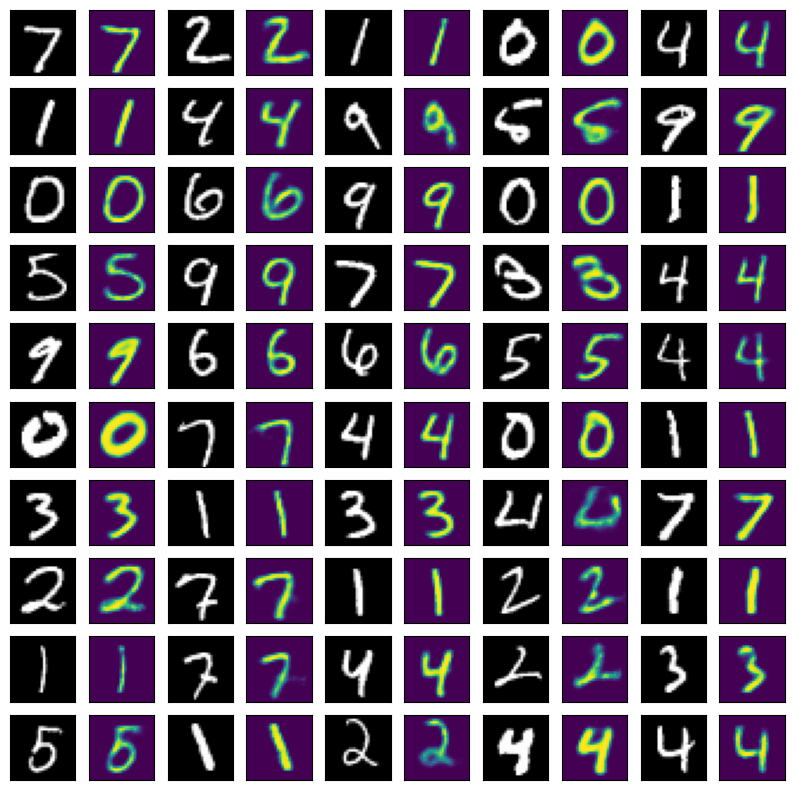

In [23]:
reconstructed_images = pretrained_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

## Load the data

In [24]:
import tensorflow as tf

from tensorflow.keras.preprocessing import image

h1 = tf.keras.utils.load_img('imageh1.png', target_size=(28,28),color_mode= "grayscale")
h2 = tf.keras.utils.load_img('imageh2.png', target_size=(28,28),color_mode= "grayscale")
h3 = tf.keras.utils.load_img('imageh3.png', target_size=(28,28),color_mode= "grayscale")
h4 = tf.keras.utils.load_img('imageh4.png', target_size=(28,28),color_mode= "grayscale")
h5 = tf.keras.utils.load_img('imageh5.png', target_size=(28,28),color_mode= "grayscale")

In [25]:
new_images = np.vstack([h1,h2,h3,h4,h5])
test_h = new_images.reshape(-1,784)
train_h = new_images.reshape(-1,784) 
train_h = train_h.astype('float32') / 255
test_h = test_h.astype('float32') / 255

In [26]:
train_h.shape

(5, 784)

## Oversampling the data

In [27]:
train_h = np.repeat(train_h[:],20, axis =0)

In [28]:
train_h.shape

(100, 784)

<function matplotlib.pyplot.show(close=None, block=None)>

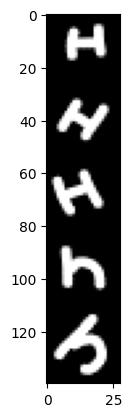

In [29]:
plt.imshow(new_images,cmap="gray")
ax.axis('off')
plt.show

In [30]:
## Create autoencoder model

In [31]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 16 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 500)               392500    
                                                                 
 dense_9 (Dense)             (None, 300)               150300    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 16)                1616      
                                                                 
 dense_12 (Dense)            (None, 100)               1700      
                                                                 
 dense_13 (Dense)            (None, 300)               30300     
                                                                 
 dense_14 (Dense)            (None, 500)              

## Random sampling the autoencoder model

In [32]:
from tensorflow.keras.callbacks import EarlyStopping 

# EarlyStopping during model training

In [33]:
new_image_set= train_images[:20000]
for i in range(len(train_h)):
    input_arr = train_h[i]
    input_arr = input_arr.reshape(784)
    np.random.shuffle(train_h)

    bad_images = np.repeat(input_arr.reshape(-1,1,28,28),135, axis=1).reshape(-1,784)
    new_image_set = np.concatenate((new_image_set, bad_images))
    np.random.shuffle(new_image_set)

    new_images_train = new_image_set[int(len(new_image_set)*.8):]
    new_images_test = new_image_set[int(len(new_image_set)*.2):]

# Train the autoencoder

In [35]:
    early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
    history = autoencoder.fit(
    x=new_images_train, # For autoencoders, both the input and the target are the same
    y=new_images_train, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(new_images_test, new_images_test),
    callbacks=[early_stop]
)    
    print('h-',i+1)

Epoch 1/10
53/53 [==============================] - 2s 24ms/step - loss: 0.3244 - val_loss: 0.2269
Epoch 2/10
53/53 [==============================] - 1s 22ms/step - loss: 0.1927 - val_loss: 0.1666
Epoch 3/10
53/53 [==============================] - 1s 22ms/step - loss: 0.1489 - val_loss: 0.1394
Epoch 4/10
53/53 [==============================] - 1s 22ms/step - loss: 0.1310 - val_loss: 0.1269
Epoch 5/10
53/53 [==============================] - 1s 22ms/step - loss: 0.1218 - val_loss: 0.1196
Epoch 6/10
53/53 [==============================] - 1s 23ms/step - loss: 0.1154 - val_loss: 0.1149
Epoch 7/10
53/53 [==============================] - 1s 22ms/step - loss: 0.1114 - val_loss: 0.1123
Epoch 8/10
53/53 [==============================] - 1s 22ms/step - loss: 0.1085 - val_loss: 0.1097
Epoch 9/10
53/53 [==============================] - 1s 22ms/step - loss: 0.1061 - val_loss: 0.1071
Epoch 10/10
53/53 [==============================] - 1s 22ms/step - loss: 0.1037 - val_loss: 0.1049
h- 100


## Test the autoencoder

838/838 [==============================] - 2s 2ms/step


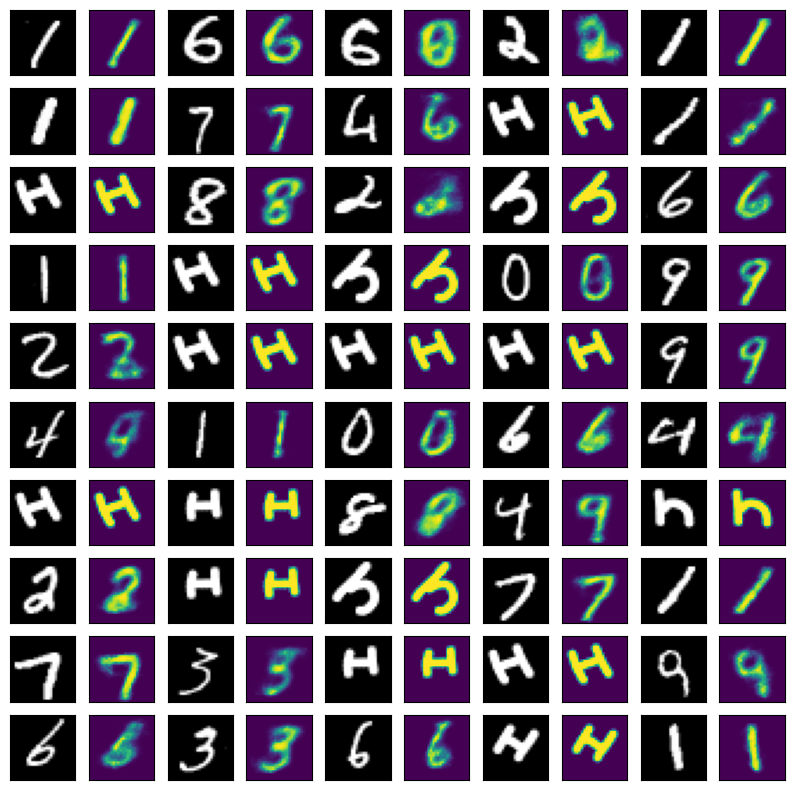

In [36]:
    reconstructed_images = autoencoder.predict(new_images_test)
    images = []
    for i in range(100):
        images.append(new_images_test[i].reshape(28,28))
        images.append(reconstructed_images[i].reshape(28,28))
    rows = 10
    cols = 10
    plt.figure(figsize=(10,10))
    for i in range(rows*cols):
        plt.subplot(rows,cols,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        if (i%2 == 0):
            plt.imshow(images[i],cmap='gray')
        else:
            plt.imshow(images[i])
    plt.show()

In [37]:
autoencoder.save('latest_autoencoder.h5')

## Analysis

We have used MNIST dataset and these digits are preprocessed by scaling their pixel values.
The pre-trained autoencoder is used to reconstruct the selected digits by passing them through the encoder and decoder parts of the model and the original digits and their reconstructed counterparts are displayed for comparison.
The same process is repeated for the custom letter images to showcase the autoencoder's ability to recreate the new character and we have saved the new data to autoencoder.